In [1]:
from gates import *
from states import *
from utils import *
import matplotlib.pyplot as plt

In [7]:
n = 20

In [8]:
state = np.array([0.17,-0.56j,-0.73,0.35j])
state = state.reshape(4,1)
rho = np.kron(state,state.conj().T)

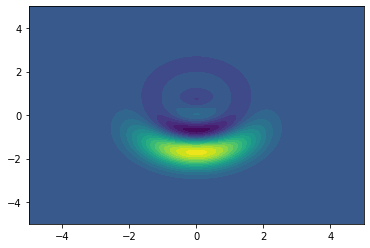

In [9]:
xvec = np.linspace(-5,5,200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()

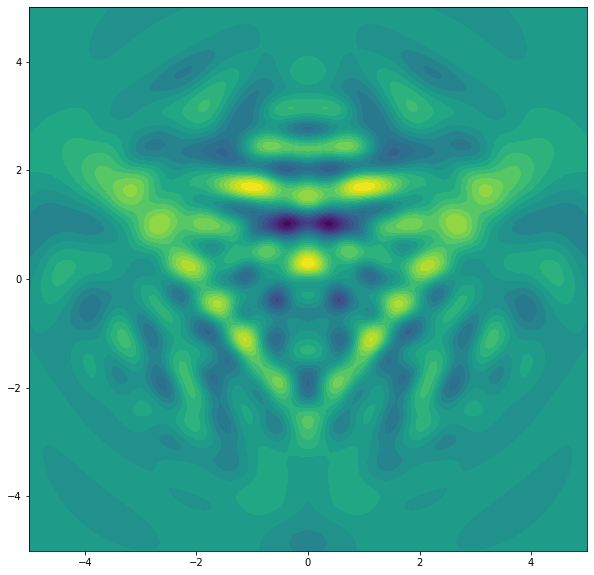

In [15]:
init_state = np.zeros(n)
init_state[0] = 1.
state = S_gate(10., 0., n).dot(init_state)
# state = D_gate(0., 0., n).dot(state)
state = V_gate(0.5, n).dot(state)
state = state.reshape(n,1)
rho = np.kron(state,state.conj().T)
plt.figure(figsize=[10,10])
xvec = np.linspace(-5, 5, 200)
W = wigner_iterative(rho, xvec, xvec)
cont0 = plt.contourf(xvec, xvec, W, 20)
plt.show()